# New Section


In [6]:
!unzip bloodcancer.zip

Archive:  bloodcancer.zip
replace Original/Benign/WBC-Benign-001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace Original/Benign/WBC-Benign-001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace Original/Benign/WBC-Benign-001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')


In [8]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.regularizers import l2

In [9]:
dataset_dir = '/content/Original'
class_names = ['Benign', 'Early', 'Pre', 'Pro']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)
dataset_dir = '/content/Segmented'
class_names = ['Benign', 'Early', 'Pre', 'Pro']

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)
images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(class_name)

images = np.array(images)
labels = np.array(labels)

In [10]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np
label_mapping = {label: i for i, label in enumerate(np.unique(labels))}
numerical_labels = np.array([label_mapping[label] for label in labels])
categorical_labels = to_categorical(numerical_labels)
X_train, X_test, y_train, y_test = train_test_split(images, categorical_labels, test_size=0.2, random_state=42)


In [11]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)




In [12]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.4358 - loss: 129.5068 - val_accuracy: 0.6948 - val_loss: 0.9691
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 343s 4s/step - accuracy: 0.8302 - loss: 0.6876 - val_accuracy: 0.8052 - val_loss: 0.6676
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 322s 4s/step - accuracy: 0.9349 - loss: 0.3643 - val_accuracy: 0.8328 - val_loss: 0.5744
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 309s 4s/step - accuracy: 0.9724 - loss: 0.1731 - val_accuracy: 0.8144 - val_loss: 0.9334
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 319s 4s/step - accuracy: 0.9815 - loss: 0.0951 - val_accuracy: 0.8282 - val_loss: 0.6834
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 326s 4s/step - accuracy: 0.9969 - loss: 0.0434 - val_accuracy: 0.8405 - val_loss: 0.9106
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 306s 4s/step - accuracy: 0.9990 - loss: 0.0202 - val_accuracy: 0.8267 - val_loss: 0.8405
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 303s 4s/step - accuracy: 0.9989 - loss: 0.0130 - val_accuracy: 0.8221 -

In [13]:
model.save('maheshbabu.h5')

In [14]:
from tensorflow.keras.models import load_model
model = load_model("maheshbabu.h5")


In [15]:
# prompt: We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`.

model.save('maheshbabu.keras')

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


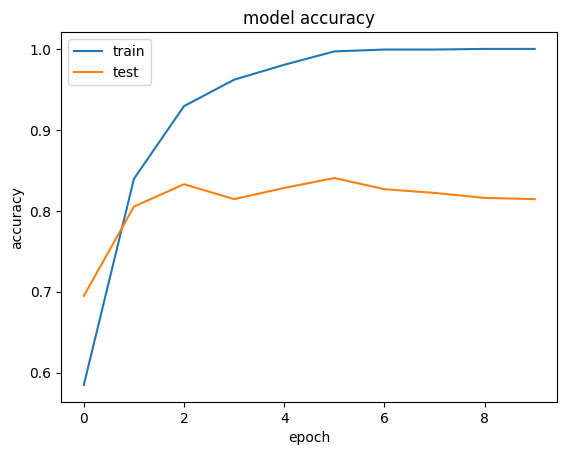

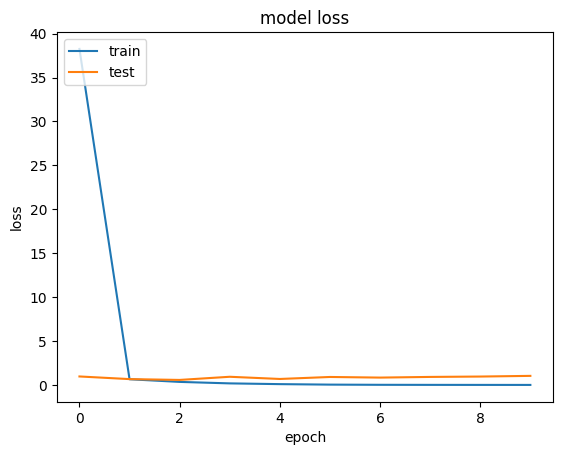

21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 900ms/step
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       124
           1       0.82      0.88      0.85       196
           2       0.77      0.80      0.78       182
           3       0.87      0.96      0.91       150

    accuracy                           0.81       652
   macro avg       0.81      0.80      0.80       652
weighted avg       0.81      0.81      0.81       652

[[ 70  13  22  19]
 [  4 172  19   1]
 [ 11  25 145   1]
 [  3   1   2 144]]


In [16]:
# prompt: check the model metrics are there  or not

print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))

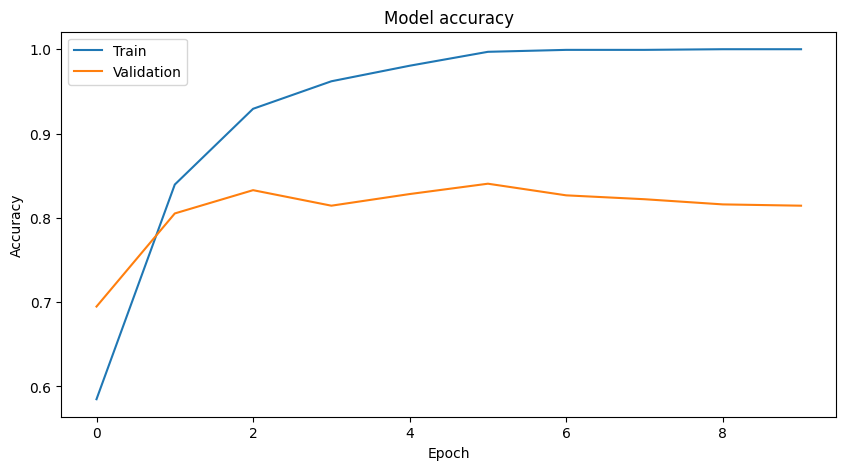

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

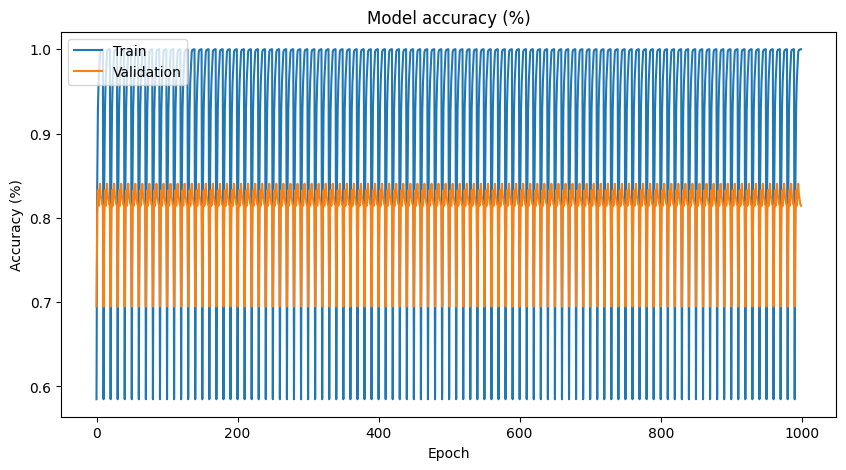

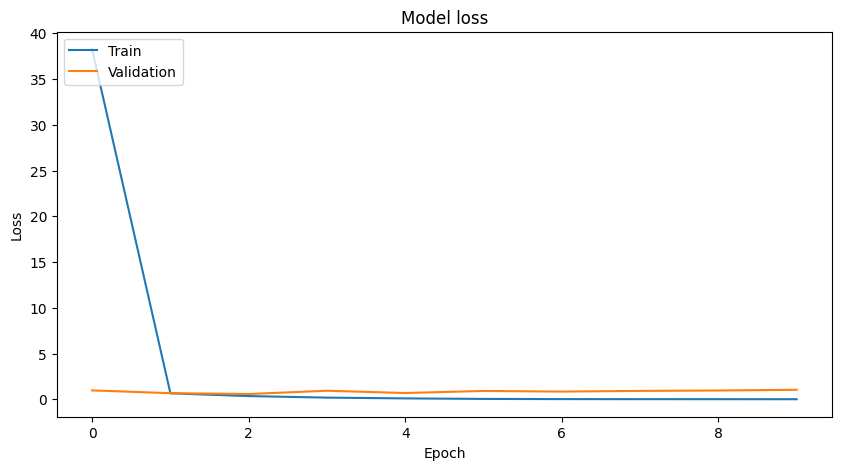

21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 935ms/step - accuracy: 0.7995 - loss: 1.0879
Test Loss: 1.0360
Test Accuracy: 81.44%
21/21 ━━━━━━━━━━━━━━━━━━━━ 19s 922ms/step


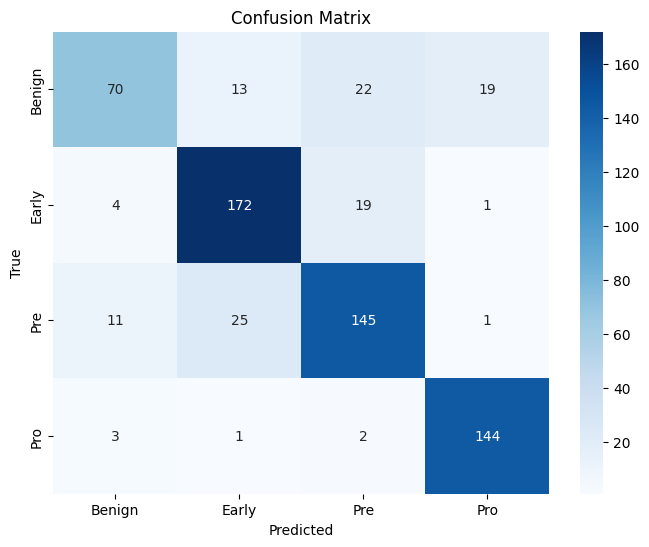

              precision    recall  f1-score   support

      Benign       0.80      0.56      0.66       124
       Early       0.82      0.88      0.85       196
         Pre       0.77      0.80      0.78       182
         Pro       0.87      0.96      0.91       150

    accuracy                           0.81       652
   macro avg       0.81      0.80      0.80       652
weighted avg       0.81      0.81      0.81       652



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'] * 100)
plt.plot(history.history['val_accuracy'] * 100)
plt.title('Model accuracy (%)')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true, y_pred_classes, target_names=np.unique(labels)))

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input


# Load the model using the correct filename 'maheshbabu.h5' or 'maheshbabu.keras'
model = load_model('maheshbabu.keras')

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    class_names = ['Benign','Early','Pre','Pro']
    predicted_label = class_names[predicted_class]

    print(f"Predicted class: {predicted_label}")

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  predict_image(fn)

Saving siva1.jpg to siva1 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted class: Pro


In [20]:
# prompt: check my flask version

!pip install flask

import flask
flask.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.2.3
    Uninstalling Werkzeug-2.2.3:
      Successfully uninstalled Werkzeug-2.2.3


'3.1.0'

In [22]:
from tensorflow.keras.models import load_model

model = load_model("mahesh.h5", compile=True)


In [25]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [26]:
pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 754.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incomp

In [2]:
from tensorflow.keras.models import load_model
model = load_model("maheshbabu.h5")


In [3]:
# prompt:  but the compiled metrics have yet to be built. `model.compile_metrics` will be empty solve this

from tensorflow.keras.models import load_model
import tensorflow as tf

# Load the model with compile=True to ensure metrics are compiled
model = load_model("maheshbabu.h5", compile=True)

# Now you can access model.metrics
model.metrics_names

['loss', 'compile_metrics']

In [4]:
# prompt: but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.

# Load the model with compile=True to ensure metrics are compiled
model = load_model("maheshbabu.h5", compile=True)

# Now you can access model.metrics
model.metrics_names

['loss', 'compile_metrics']

In [5]:
model.evaluate(X_test, y_test)


NameError: name 'X_test' is not defined